# **Sign Language Translator**

## Import Libraries


In [8]:
# To make sure the correct version of tensorflow is installed which can convert yolov8 onnx model to tflite
# %pip install tensorflow==2.13.1
## If want to use latest version of tensorflow
# %pip install tensorflow --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 7.2 MB/s eta 0:00:0000:0100:01
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 6.3 MB/s eta 0:00:0000:0100:02m
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Atte

In [1]:
%%capture
%pip install ultralytics
import torch
import ultralytics
from ultralytics import YOLO
import tensorflow as tf
from tensorflow import keras
from keras import layers
%pip install keras-cv
import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
%pip install scikit-image
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import requests
import json
from keras.preprocessing.image import ImageDataGenerator
import random
import cv2
import os
# from google.colab import files
import io
# from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import shutil
import pathlib
from tqdm.notebook import tqdm
%pip install tensorflow_hub

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!nvidia-smi

## Data Preprocessing

<h2>Load Datasets</h2>


Roboflow https://public.roboflow.com/object-detection/american-sign-language-letters/1

In [2]:
!curl -L "https://public.roboflow.com/ds/YiFqJk1ben?key=4YTWBkDZe6" > roboflow.zip; unzip -n roboflow.zip; rm roboflow.zip
# !mv -t train test/* valid/*;
# !rm -r test valid README.dataset.txt README.roboflow.txt;

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1503      0 --:--:-- --:--:-- --:--:--  1502
100 22.4M  100 22.4M    0     0  5243k      0  0:00:04  0:00:04 --:--:-- 7233k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg  
 extracting: test/images/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg  
 extracting: test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg  
 extracting: test/images/B19_jpg.rf.69527cc1f34d694cc04e55db80ed9b1a.jpg  
 extracting: test/images/C17_jpg.rf.ceb81f8ae3c3673bd060ebe71848eca8.jpg  
 extracting: test/images/C19_jpg.rf.577ce02a223c65e89dc4a4eacd130040.jpg  
 extracting: test/images/C22_jpg.rf.e54cbbfdd4ea0670

<!-- Correct Classes -->

Roboflow https://universe.roboflow.com/hand-signs-9v6jr/asl-and-fsl-combo  

In [1]:
!curl -L "https://universe.roboflow.com/ds/MzjFV1GcYm?key=mNTM3B32Dy" > roboflow.zip; unzip -n roboflow.zip "*/*/[iAvtdyLkwprs]*_mp4*"; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   895    0     0   1629      0 --:--:-- --:--:-- --:--:--  1627
100 61.1M  100 61.1M    0     0  7494k      0  0:00:08  0:00:08 --:--:--  9.8M
Archive:  roboflow.zip
 extracting: test/images/s_mp4-10_jpg.rf.a4e9a3dfbcdfd7a19054fd59ceacd1d2.jpg  
 extracting: test/images/s_mp4-6_jpg.rf.5e3da4479938afec4d42f79150c50626.jpg  
 extracting: test/labels/s_mp4-10_jpg.rf.a4e9a3dfbcdfd7a19054fd59ceacd1d2.txt  
 extracting: test/labels/s_mp4-6_jpg.rf.5e3da4479938afec4d42f79150c50626.txt  
 extracting: train/images/s_mp4-0_jpg.rf.406426a58b2e7b9aa5d8f62bbcfbefe4.jpg  
 extracting: train/images/s_mp4-13_jpg.rf.4c2a152caaf6311de011827fa267bfac.jpg  
 extracting: train/images/s_mp4-14_jpg.rf.3c244228279c8616668ae9a65ec289d4.jpg  
 extracting: train/images/s_mp4-14_jpg.rf.5cf5191120ec3d58dc56dca4f69ea45c.jpg  
 extracting: train/i

Roboflow https://universe.roboflow.com/tfod-p4luj/sign_language-acf74

In [2]:
!curl -L "https://universe.roboflow.com/ds/sX6kbrVSMN?key=1ckOdj2VhH" > roboflow.zip; unzip -n roboflow.zip -x "*_z_*" "*_j_*"; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   903  100   903    0     0   1837      0 --:--:-- --:--:-- --:--:--  1839
100 64.4M  100 64.4M    0     0  7138k      0  0:00:09  0:00:09 --:--:-- 9989k
Archive:  roboflow.zip
 extracting: test/images/hand5_s_dif_seg_4_cropped_jpeg.rf.c8d3177a7532bd3b96414cd49c3f9513.jpg  
 extracting: test/images/hand5_s_dif_seg_5_cropped_jpeg.rf.7c9414b532f815825cdf1c4bb82f0758.jpg  
 extracting: test/labels/hand5_s_dif_seg_4_cropped_jpeg.rf.c8d3177a7532bd3b96414cd49c3f9513.txt  
 extracting: test/labels/hand5_s_dif_seg_5_cropped_jpeg.rf.7c9414b532f815825cdf1c4bb82f0758.txt  
 extracting: train/images/hand1_s_bot_seg_1_cropped_jpeg.rf.28bf1ea36def86bd80b3ad3abf39e857.jpg  
 extracting: train/images/hand1_s_bot_seg_1_cropped_jpeg.rf.8ae053d75bbc1d0912ddbea03c99a6ab.jpg  
 extracting: train/images/hand1_s_bot_seg_1_cropped_jpeg.rf.90ded3180ae711ce5d1e93b4fd9a8dcb.jpg  
 extracting: train/images/hand1_s_bot_seg_2_cropped_jpeg.rf.2e4f8ff97d8eb7fc5d16cbe6341e3e6b.jpg  
 extracting: train/images/hand1

Loicmarie GitHub sign-language-alphabet-recognizer

In [6]:
!mkdir train_cnn

In [7]:
%%capture
!curl -L https://api.github.com/repos/loicmarie/sign-language-alphabet-recognizer/tarball/master | tar -xz --wildcards --strip=2 -C train_cnn loicmarie-sign-language-alphabet-recognizer-*/dataset/*

<h2>Remove remaining Subfolders
</h2>


In [8]:
# directory = "/content/train/"
directory = "train_cnn"
source_dir = pathlib.Path(directory)
target_dir = pathlib.Path(directory)
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    target_dir.joinpath(letter).mkdir(exist_ok=True)

for file in source_dir.iterdir():
    if file.is_file():
        first_letter = file.name[0].upper()
        if first_letter.isalpha():
            shutil.move(file, target_dir.joinpath(first_letter, file.name))
        else:
            os.remove(file)

In [10]:
subfolders = [f.path for f in os.scandir('train_cnn') if f.is_dir()]
for subfolder in subfolders:
  if subfolder == "train_cnn/space" or subfolder == "train_cnn/del" or subfolder == "train_cnn/nothing":
    shutil.rmtree(subfolder)
    continue

In [3]:
!ls train_cnn/

A  B  C  D  E  F  G  H	I  J  K  L  M  N  O  P	Q  R  S  T  U  V  W  X	Y  Z


Define Image size, image channels and number of classes

In [3]:
image_size = 64
img_channel = 3
n_classes = 26 
length = 78000
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z']

In [4]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Extracting images of symbol ", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (image_size, image_size))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data("/home/atalaydenknalbant/jupyter_notebooks/train_cnn") 

Extracting images of symbol  B ...
Extracting images of symbol  Y ...
Extracting images of symbol  O ...
Extracting images of symbol  X ...
Extracting images of symbol  C ...
Extracting images of symbol  J ...
Extracting images of symbol  F ...
Extracting images of symbol  A ...
Extracting images of symbol  T ...
Extracting images of symbol  K ...
Extracting images of symbol  S ...
Extracting images of symbol  E ...
Extracting images of symbol  M ...
Extracting images of symbol  G ...
Extracting images of symbol  N ...
Extracting images of symbol  U ...
Extracting images of symbol  L ...
Extracting images of symbol  V ...
Extracting images of symbol  P ...
Extracting images of symbol  W ...
Extracting images of symbol  Z ...
Extracting images of symbol  R ...
Extracting images of symbol  Q ...
Extracting images of symbol  D ...
Extracting images of symbol  I ...
Extracting images of symbol  H ...


In [5]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalized_X = np_X.astype('float32')/255.0
    
    label_encoded_y = keras.utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalized_X, label_encoded_y, test_size = 0.05, random_state=70)
    
    del normalized_X, label_encoded_y
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

How Many Images Training and Test Have?

In [6]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (74100, 64, 64, 3)
Test data: (3900, 64, 64, 3)


Free up some space

In [7]:
del X
del y

In [ ]:
print(f"Total Images: {len(df.index)}")

Total Images: 79728


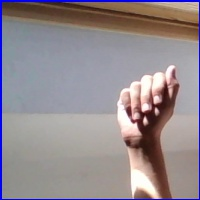

In [ ]:
img = cv2.imread("/content/train/A1000.jpg")
cv2_imshow(img)

Remove Reduntant Columns

In [12]:
df_final = df.drop(['image_height', 'image_width', 'image_label_num'], axis=1)

Splitting dataset into train test valid
%99 Train
%1 Test
%1 Validation

In [13]:
df_final = df_final.sample(frac=1, random_state=42)
train, test, valid = np.split(df_final, [int(.99*len(df_final)), int(.995*len(df_final))])

/home/atalaydenknalbant/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
train

image_path image_label
20565   F/F924.jpg           F
16252  J/J2830.jpg           J
34277   E/E856.jpg           E
53913  V/V2170.jpg           V
21537  A/A2782.jpg           A
...            ...         ...
27139  T/T2069.jpg           T
72303   D/D419.jpg           D
71158  D/D1105.jpg           D
1605     B/B42.jpg           B
27285  T/T2364.jpg           T

[78930 rows x 2 columns]

In [14]:
test_labels = test['image_label'] 
test.drop(['image_label'], axis=1, inplace=True)

In [24]:
print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))
print("valid shape: {}".format(valid.shape))

train shape: (78930, 2)
test shape: (399, 1)
valid shape: (399, 2)


Total Appearances of Unique Labels

In [15]:
label_counts = train['image_label'].value_counts()
label_counts = train['image_label'].value_counts().to_dict()
label_counts

{'J': 3060,
 'I': 3055,
 'S': 3054,
 'Z': 3047,
 'G': 3047,
 'L': 3044,
 'D': 3042,
 'C': 3041,
 'F': 3041,
 'H': 3039,
 'K': 3039,
 'W': 3038,
 'E': 3036,
 'N': 3036,
 'Q': 3034,
 'X': 3031,
 'O': 3030,
 'U': 3029,
 'V': 3029,
 'A': 3028,
 'T': 3026,
 'M': 3024,
 'P': 3022,
 'B': 3021,
 'R': 3020,
 'Y': 3017}

### Implementing Datagen for model input

In [16]:
# datagen = ImageDataGenerator(horizontal_flip=True,
#                              rotation_range=50,
#                              zoom_range=0.2,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              rescale=1./255)
# test_datagen=ImageDataGenerator(rescale=1./255.)
# # directory = "/content/train/"
# directory = "/home/atalaydenknalbant/jupyter_notebooks/train/"
# batch_size = 64
# epochs = 100
# image_size = 224
# img_channel = 3
# n_classes = 26 

In [17]:
# train_gen = datagen.flow_from_dataframe(dataframe = train,
#                                         directory = directory,
#                                         x_col="image_path",
#                                         y_col="image_label",
#                                         target_size=(image_size,image_size),
#                                         class_mode="categorical",
#                                         subset="training",
#                                         save_format='jpg',
#                                              classes=labels,
#                                         seed=42
#                                           )
# test_gen = test_datagen.flow_from_dataframe(dataframe = test,
#                                        directory = directory,
#                                         x_col="image_path",
#                                         y_col=None,
#                                         target_size=(image_size,image_size),
#                                         class_mode=None,
#                                         save_format='jpg',
#                                         seed=42
#                                           )

Found 78930 validated image filenames belonging to 26 classes.
Found 399 validated image filenames.


## Data Visualization

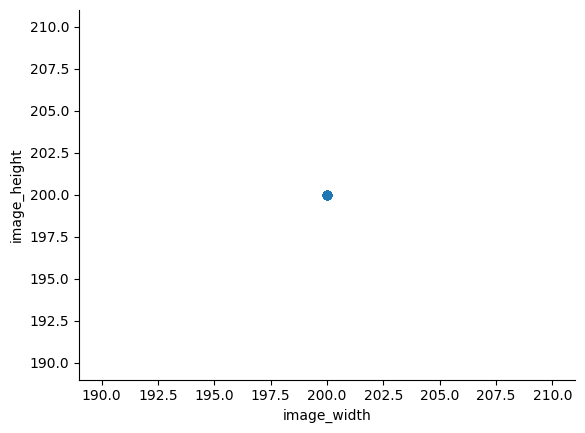

In [ ]:
df.plot(kind='scatter', x='image_width', y='image_height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#df.plot(kind='scatter', x='index', y='image_width', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

Bar chart for the number samples for each letter.

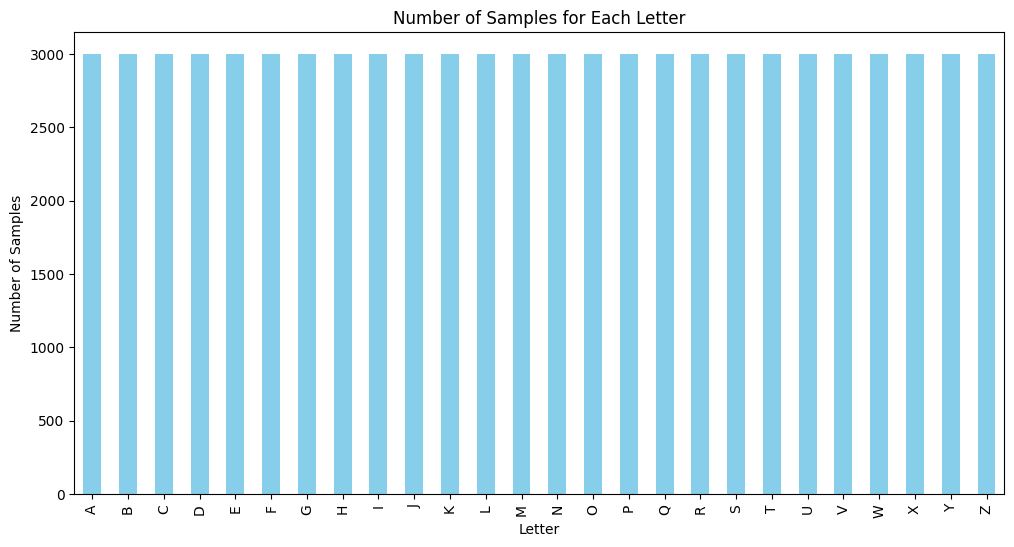

In [ ]:
image_label = "image_label"

letter_counts = df[image_label].value_counts()

plt.figure(figsize=(12,6))
letter_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title(f"Number of Samples for Each Letter")
plt.xlabel("Letter")
plt.ylabel("Number of Samples")
plt.show()

## Modeling

### Define Callbacks

In [9]:
checkpoint_filepath = os.path.join('checkpoints', 'op' + \
        '.{epoch:03d}-{val_loss:.3f}-best.h5')
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 4,
                              restore_best_weights= True,
                              verbose = 0)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
                                            filepath=checkpoint_filepath,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            verbose=1,
                                            mode='max',
                                            save_best_only=True)
# reduce_learning_rate = keras.callbacks.ReduceLROnPlateau(monitor='accuracy',
#                                          patience = 2,
#                                          factor=0.5 ,
#                                          verbose = 1)

### Custom CNN Model

In [10]:
model = keras.Sequential([
layers.Conv2D(32, (5, 5), input_shape=(image_size,image_size,img_channel), activation='relu'),
layers.Conv2D(32, (5, 5), activation='relu'),
layers.MaxPooling2D((2, 2)) ,
layers.Conv2D(64, (5, 5), activation='relu'),
layers.Conv2D(64, (5, 5), activation='relu') ,
layers.MaxPooling2D((2, 2)) ,
layers.Flatten() ,
layers.Dense(128, activation='relu') ,
layers.Dense(26, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                   

In [11]:
hst = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.01, callbacks=[early_stopping, model_checkpoint_callback], verbose=1)

Epoch 1/30


I0000 00:00:1706966615.285693    2475 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2293/2293 [==============================] - ETA: 0s - loss: 0.7562 - accuracy: 0.7693
Epoch 1: val_accuracy improved from -inf to 0.96491, saving model to checkpoints/op.001-0.114-best.h5
2293/2293 [==============================] - 20s 7ms/step - loss: 0.7562 - accuracy: 0.7693 - val_loss: 0.1143 - val_accuracy: 0.9649
Epoch 2/30
2288/2293 [============================>.] - ETA: 0s - loss: 0.0709 - accuracy: 0.9775
Epoch 2: val_accuracy improved from 0.96491 to 0.99055, saving model to checkpoints/op.002-0.027-best.h5
2293/2293 [==============================] - 15s 7ms/step - loss: 0.0709 - accuracy: 0.9775 - val_loss: 0.0270 - val_accuracy: 0.9906
Epoch 3/30
2290/2293 [============================>.] - ETA: 0s - loss: 0.0466 - accuracy: 0.9859
Epoch 3: val_accuracy did not improve from 0.99055
2293/2293 [==============================] - 16s 7ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 4/30
2288/2293 [============================>.] - E

#### Evaluate Model

In [12]:
model.evaluate(x_test, y_test)

122/122 [==============================] - 1s 5ms/step - loss: 0.0241 - accuracy: 0.9918


[0.024064525961875916, 0.9917948842048645]

#### Test Model

122/122 - 0s - 238ms/epoch - 2ms/step


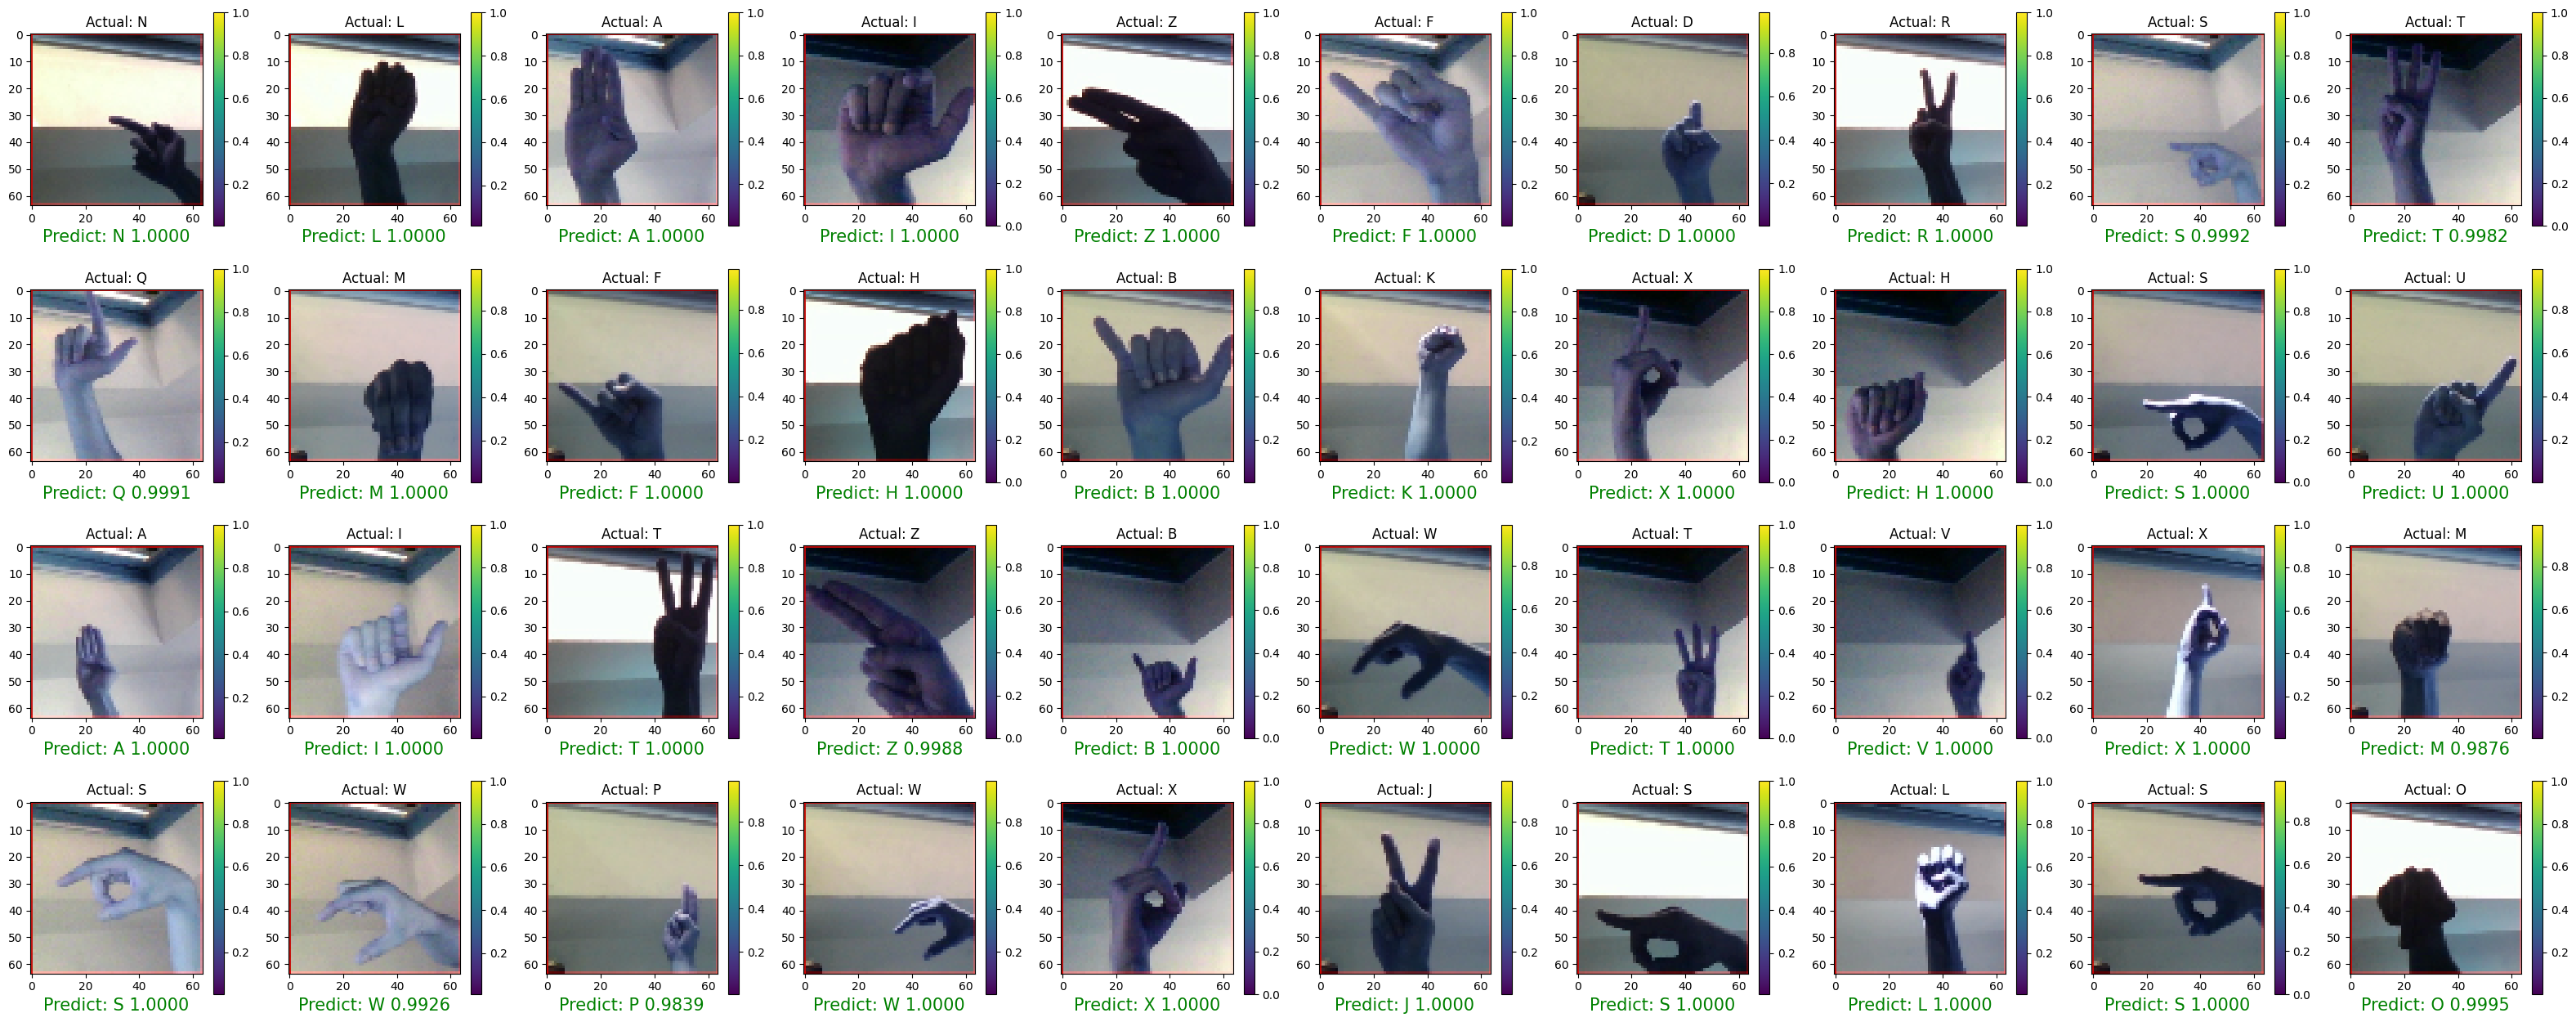

In [19]:
predictions = model.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  # plt.colorbar()
  plt.grid(False)
  plt.subplots_adjust(hspace=0.25)
  color = 'green' if classes[np.argmax(y_test[i])] == classes[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {classes[np.argmax(y_test[i])]}", color=color,fontsize=40)
  plt.xlabel(f"Predict: {classes[np.argmax(predictions[i])]} {'%.4f' % np.max(predictions[i])}",color=color,fontsize=40)
  i+=1
  if i == 40:
    break

#### Load Model

In [2]:
cnn_model = tf.keras.models.load_model('cnn_model.h5')

#### Save Model

In [14]:
model.save('cnn_model.h5')

/home/atalaydenknalbant/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Yolov8 Model

#### Roboflow only with bounding box data

In [ ]:
# %pip install -U ultralytics

Small Model

In [ ]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv5n model
model = YOLO('yolov5m.pt')

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data='data.yaml', epochs=100, imgsz=416)
model.export(format="tflite")

In [1]:
from ultralytics import YOLO

yolo_model_s = YOLO("yolov8s.pt")  
yolo_model_s.train(data="data.yaml", imgsz=416, epochs=200, seed=42, dropout=0.5,plots=True)  
yolo_model_s.export(format="tflite") 

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /home/atalaydenknalbant/jupyter_notebooks/train/labels.cache... 6250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6250/6250 [00:00<?, ?it/s]
val: Scanning /home/atalaydenknalbant/jupyter_notebooks/valid/labels.cache... 263 images, 0 backgrounds, 0 corrupt: 100%|██████████| 263/263 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.91G     0.7052      2.593      1.179         20        416: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.12it/s]

                   all        263        263      0.523      0.612      0.625      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.95G     0.5658      1.274      1.032         23        416: 100%|██████████| 391/391 [00:28<00:00, 13.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.60it/s]

                   all        263        263      0.721      0.732      0.825      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.95G     0.6311      1.182      1.054         24        416: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.82it/s]

                   all        263        263       0.61      0.774      0.744      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.95G     0.6559      1.194      1.065         30        416: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.36it/s]


                   all        263        263       0.73      0.796      0.849      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.95G     0.6355      1.084      1.057         24        416: 100%|██████████| 391/391 [00:29<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.63it/s]


                   all        263        263      0.776      0.822      0.863      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.95G     0.6129      1.012      1.045         27        416: 100%|██████████| 391/391 [00:29<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.60it/s]

                   all        263        263      0.829      0.842      0.895      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.94G     0.5816     0.9342      1.028         27        416: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.73it/s]


                   all        263        263      0.818      0.834      0.903       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.97G     0.5575     0.8674      1.016         27        416: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]


                   all        263        263      0.719      0.867      0.874      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.95G     0.5479     0.8316      1.011         25        416: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        263        263      0.846      0.879       0.91      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.96G     0.5318        0.8      1.004         25        416: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]

                   all        263        263      0.861      0.904      0.931      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.93G     0.5192     0.7663      1.002         31        416: 100%|██████████| 391/391 [00:34<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]

                   all        263        263      0.905      0.905       0.95      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.97G     0.5061     0.7471     0.9979         29        416: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]


                   all        263        263      0.865      0.869      0.916      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.97G     0.4898     0.7185     0.9902         27        416: 100%|██████████| 391/391 [00:33<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.32it/s]

                   all        263        263      0.901      0.868      0.945      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.95G     0.4875     0.7103     0.9883         20        416: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]


                   all        263        263      0.946      0.835      0.936      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.95G     0.4883     0.6965     0.9867         27        416: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.09it/s]

                   all        263        263      0.876        0.9      0.942      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.96G     0.4809     0.6707     0.9864         34        416: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        263        263      0.925      0.922      0.959      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.97G      0.466     0.6654     0.9812         24        416: 100%|██████████| 391/391 [00:32<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.68it/s]

                   all        263        263      0.937      0.905      0.966      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.95G     0.4627      0.643     0.9783         26        416: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]


                   all        263        263      0.888      0.916      0.942      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.94G     0.4614     0.6307     0.9789         25        416: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]


                   all        263        263       0.94      0.931      0.967      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.97G     0.4549      0.624     0.9757         27        416: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        263        263      0.929      0.917      0.966      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.95G     0.4546     0.6165     0.9758         25        416: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]

                   all        263        263      0.933      0.927      0.973      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.95G     0.4478     0.6079     0.9735         29        416: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.18it/s]


                   all        263        263      0.936      0.908      0.965      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.95G     0.4438     0.5968     0.9725         23        416: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]

                   all        263        263      0.928      0.941      0.972      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.97G     0.4397     0.5842     0.9704         26        416: 100%|██████████| 391/391 [00:34<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        263        263      0.932      0.942       0.97      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.96G     0.4377     0.5742     0.9676         21        416: 100%|██████████| 391/391 [00:34<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        263        263      0.927      0.921      0.964      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.95G     0.4337     0.5712      0.964         26        416: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]


                   all        263        263      0.938      0.927       0.97      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.95G     0.4278     0.5589     0.9636         23        416: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.38it/s]


                   all        263        263      0.917      0.916      0.949      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.95G     0.4247     0.5505     0.9652         21        416: 100%|██████████| 391/391 [00:32<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        263        263      0.931      0.928      0.968      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.95G     0.4303     0.5563     0.9671         23        416: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]

                   all        263        263      0.951      0.931      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.97G     0.4259     0.5391     0.9633         37        416: 100%|██████████| 391/391 [00:33<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]

                   all        263        263      0.929      0.943      0.972      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.95G     0.4138     0.5334     0.9585         17        416: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]


                   all        263        263      0.945      0.917      0.963       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.97G     0.4152     0.5272     0.9593         23        416: 100%|██████████| 391/391 [00:34<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]

                   all        263        263       0.95      0.943      0.972      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.97G     0.4099     0.5138     0.9559         17        416: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        263        263      0.949      0.935      0.977      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.95G       0.41     0.5175     0.9585         22        416: 100%|██████████| 391/391 [00:34<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        263        263      0.943      0.936      0.972      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.93G     0.4064     0.5154     0.9575         22        416: 100%|██████████| 391/391 [00:33<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.85it/s]


                   all        263        263      0.942      0.954      0.969      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.97G     0.4032     0.5066     0.9562         30        416: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.08it/s]

                   all        263        263      0.941      0.953      0.973      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.97G     0.4082     0.5093     0.9572         22        416: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]

                   all        263        263      0.943      0.947      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.97G     0.3967      0.491     0.9534         22        416: 100%|██████████| 391/391 [00:31<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.15it/s]

                   all        263        263      0.954      0.924      0.979      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.93G     0.3996     0.4873     0.9506         29        416: 100%|██████████| 391/391 [00:34<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.26it/s]

                   all        263        263      0.936      0.919      0.961      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.97G     0.4004     0.4918     0.9545         23        416: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]

                   all        263        263      0.942      0.929      0.972       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.95G     0.4021     0.4803     0.9541         29        416: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        263        263      0.955      0.935      0.981      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.97G     0.3986     0.4793     0.9525         23        416: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        263        263      0.947      0.932       0.97      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.93G     0.3914     0.4668     0.9489         28        416: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]


                   all        263        263      0.932      0.932      0.964      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.95G      0.387     0.4678     0.9505         21        416: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.90it/s]

                   all        263        263      0.931      0.932      0.971      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.95G     0.3861     0.4604     0.9461         32        416: 100%|██████████| 391/391 [00:35<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]

                   all        263        263      0.953      0.924       0.97      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.96G     0.3869     0.4627     0.9456         30        416: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        263        263      0.924      0.946      0.964      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.94G     0.3825     0.4554     0.9461         27        416: 100%|██████████| 391/391 [00:32<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]

                   all        263        263      0.943      0.936      0.962      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.97G     0.3772      0.444     0.9435         32        416: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]


                   all        263        263       0.95      0.911       0.96      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.97G     0.3865     0.4513     0.9482         26        416: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]


                   all        263        263      0.947      0.939      0.967      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.95G     0.3843     0.4489     0.9458         22        416: 100%|██████████| 391/391 [00:34<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]

                   all        263        263      0.927      0.943      0.975      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.93G     0.3815     0.4429     0.9452         22        416: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]

                   all        263        263      0.949      0.946      0.974      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.97G     0.3771     0.4377     0.9439         22        416: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]

                   all        263        263      0.956      0.929      0.982      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.97G     0.3731     0.4341     0.9418         25        416: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        263        263      0.955      0.946      0.983      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.97G     0.3732     0.4351     0.9425         27        416: 100%|██████████| 391/391 [00:34<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        263        263      0.957      0.937      0.974      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.94G     0.3754     0.4288     0.9431         27        416: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all        263        263      0.943      0.934      0.972      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.97G     0.3735     0.4315     0.9439         26        416: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.17it/s]

                   all        263        263      0.949      0.918      0.976      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.97G     0.3717     0.4286     0.9425         22        416: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]


                   all        263        263      0.949      0.922       0.97      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.95G     0.3688     0.4193     0.9411         24        416: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]

                   all        263        263       0.95      0.934      0.969      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.95G     0.3674     0.4288     0.9417         27        416: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.07it/s]

                   all        263        263      0.938      0.935      0.967      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.96G     0.3681     0.4165     0.9426         25        416: 100%|██████████| 391/391 [00:34<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        263        263      0.945      0.935      0.962       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.95G     0.3716     0.4149     0.9416         23        416: 100%|██████████| 391/391 [00:33<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        263        263      0.939      0.931      0.968      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.96G     0.3651     0.4096     0.9406         20        416: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.29it/s]

                   all        263        263      0.951      0.933      0.969      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.95G     0.3614     0.4112     0.9383         26        416: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.22it/s]

                   all        263        263      0.938      0.933      0.976      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.95G     0.3579     0.4022     0.9357         30        416: 100%|██████████| 391/391 [00:34<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]


                   all        263        263      0.966      0.937      0.975      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.96G     0.3598     0.4025     0.9377         26        416: 100%|██████████| 391/391 [00:34<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        263        263      0.975      0.938      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.95G     0.3605     0.3962     0.9342         20        416: 100%|██████████| 391/391 [00:33<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]

                   all        263        263      0.956      0.916      0.976      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.95G     0.3511     0.3885     0.9363         25        416: 100%|██████████| 391/391 [00:32<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.38it/s]

                   all        263        263      0.945      0.935      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.96G     0.3547     0.3924     0.9354         26        416: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        263        263      0.939      0.928      0.965      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.96G     0.3557      0.398     0.9366         26        416: 100%|██████████| 391/391 [00:32<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        263        263      0.943      0.921      0.969      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.97G     0.3558      0.388     0.9375         30        416: 100%|██████████| 391/391 [00:34<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        263        263      0.947       0.93      0.964      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.95G     0.3553     0.3809     0.9376         21        416: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]

                   all        263        263      0.956      0.943       0.97      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.97G     0.3503     0.3785     0.9357         29        416: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.03it/s]

                   all        263        263      0.952      0.929      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.95G     0.3491     0.3774     0.9341         22        416: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.27it/s]

                   all        263        263      0.957      0.943      0.971      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.97G     0.3465     0.3789     0.9319         20        416: 100%|██████████| 391/391 [00:32<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.97it/s]

                   all        263        263      0.956      0.925       0.97       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.95G     0.3495      0.376     0.9305         21        416: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.44it/s]

                   all        263        263      0.962      0.951      0.973      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.95G     0.3453     0.3754     0.9321         18        416: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]

                   all        263        263      0.962      0.937      0.971      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.95G     0.3488     0.3693     0.9355         26        416: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.50it/s]

                   all        263        263      0.961      0.937      0.972      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.96G     0.3448      0.376     0.9338         29        416: 100%|██████████| 391/391 [00:31<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]

                   all        263        263      0.962      0.937      0.969      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.95G     0.3457      0.368     0.9338         26        416: 100%|██████████| 391/391 [00:32<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]

                   all        263        263      0.951      0.945       0.97      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.95G     0.3433     0.3689     0.9278         28        416: 100%|██████████| 391/391 [00:32<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]


                   all        263        263      0.962      0.939      0.966      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.96G      0.343     0.3617     0.9316         27        416: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.40it/s]

                   all        263        263      0.952      0.938      0.963      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.95G     0.3435     0.3652     0.9324         28        416: 100%|██████████| 391/391 [00:34<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        263        263      0.972      0.944      0.981       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.93G     0.3428     0.3645     0.9326         30        416: 100%|██████████| 391/391 [00:34<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.12it/s]

                   all        263        263      0.964       0.93      0.977      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.97G     0.3421     0.3586      0.931         25        416: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.54it/s]

                   all        263        263      0.963      0.932      0.973      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.95G     0.3374     0.3477     0.9264         30        416: 100%|██████████| 391/391 [00:34<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.65it/s]

                   all        263        263      0.934      0.924       0.96      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.94G     0.3351     0.3513     0.9283         29        416: 100%|██████████| 391/391 [00:34<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]

                   all        263        263      0.956      0.939      0.969       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.94G     0.3403     0.3548     0.9295         28        416: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]


                   all        263        263      0.945       0.93      0.965      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.97G     0.3345     0.3501     0.9293         26        416: 100%|██████████| 391/391 [00:33<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]


                   all        263        263      0.948      0.927      0.965      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.95G     0.3371     0.3495     0.9314         28        416: 100%|██████████| 391/391 [00:32<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.21it/s]


                   all        263        263       0.95      0.932      0.969      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.97G     0.3331     0.3447     0.9273         27        416: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]


                   all        263        263      0.935      0.934      0.962      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.95G     0.3302     0.3379     0.9284         27        416: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.43it/s]

                   all        263        263      0.955      0.936      0.972      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.95G     0.3317     0.3412     0.9277         34        416: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]

                   all        263        263      0.939      0.939      0.957       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.96G     0.3348     0.3465     0.9288         30        416: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]

                   all        263        263      0.946      0.932      0.963      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.95G     0.3318     0.3445      0.927         28        416: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.16it/s]

                   all        263        263      0.957      0.938      0.974      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.94G     0.3291     0.3369     0.9245         24        416: 100%|██████████| 391/391 [00:34<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]


                   all        263        263      0.948      0.951       0.97      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.96G      0.324     0.3349     0.9269         27        416: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        263        263      0.949      0.943      0.966      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.96G     0.3268      0.335     0.9279         25        416: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.23it/s]

                   all        263        263       0.94      0.937      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.95G     0.3259     0.3405     0.9268         25        416: 100%|██████████| 391/391 [00:32<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]

                   all        263        263      0.933      0.945       0.96      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.94G     0.3265     0.3318     0.9258         27        416: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.14it/s]

                   all        263        263      0.939      0.931      0.972      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.97G     0.3242     0.3307     0.9285         28        416: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.30it/s]


                   all        263        263      0.944       0.94      0.974      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.95G      0.327     0.3248     0.9258         20        416: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]


                   all        263        263      0.945      0.935      0.967      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.97G     0.3212     0.3226     0.9248         28        416: 100%|██████████| 391/391 [00:34<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        263        263      0.946      0.946      0.965      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.93G     0.3188     0.3227     0.9259         19        416: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.15it/s]


                   all        263        263      0.959      0.935      0.972      0.838
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 53, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

103 epochs completed in 0.987 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 22.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]


                   all        263        263      0.955      0.946      0.983      0.842
                     A        263          8      0.884          1      0.995      0.794
                     B        263          9      0.954      0.889      0.961      0.834
                     C        263          3      0.953          1      0.995      0.798
                     D        263         10      0.915          1      0.995      0.823
                     E        263          4      0.793          1      0.995       0.86
                     F        263          8      0.955          1      0.995      0.842
                     G        263          5      0.982          1      0.995      0.811
                     H        263          9      0.991          1      0.995      0.737
                     I        263          6      0.709      0.833      0.869       0.76
                     J        263          9      0.988      0.889      0.893      0.633
                     

'runs/detect/train11/weights/best_saved_model/best_float32.tflite'

#### Load Model

In [2]:
yolo_model_s = YOLO("runs/detect/train11/weights/best.pt")  

In [1]:
# # Import the required libraries
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# # Load the TFLite model and allocate tensors
# interpreter = tf.lite.Interpreter(model_path="runs/detect/train11/weights/best_saved_model/best_float32.tflite")
# interpreter.allocate_tensors()

# # Get input and output details
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# # Define the image paths and labels
# image_paths = ["WhatsApp Image 2024-02-08 at 15.46.55_fbf487d0.jpg", "WhatsApp Image 2024-02-08 at 15.48.04_2e487024.jpg"]
# image_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
#            'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
#            'W','X','Y','Z']

# # Loop over the images
# for i, image_path in enumerate(image_paths):
#   # Read and resize the image
#   image = tf.io.read_file(image_path)
#   image = tf.io.decode_image(image, channels=3)
#   image = tf.image.resize(image, (input_details[0]['shape'][1], input_details[0]['shape'][2]))
#   image = tf.cast(image, tf.uint8)

#   # Preprocess the image
#   input_data = tf.expand_dims(image, axis=0)
#   input_data = tf.cast(input_data, input_details[0]['dtype'])

#   # Set the input tensor and invoke the interpreter
#   interpreter.set_tensor(input_details[0]['index'], input_data)
#   interpreter.invoke()

#   # Get the output tensor
#   output_data = interpreter.get_tensor(output_details[0]['index'])
#   output_data = output_data.squeeze()

#   # Postprocess the output
#   # The output format is [ymin, xmin, ymax, xmax, label, score]
#   # You can adjust the threshold as needed
#   threshold = 0.1
#   boxes = output_data[output_data[:, 5] > threshold, :4]
#   # Adjust the label variable to match the model's output range
#   labels = output_data[output_data[:, 5] > threshold, 4].astype(np.int32) - 1
#   scores = output_data[output_data[:, 5] > threshold, 5]

#   # Visualize the results
#   fig, ax = plt.subplots(1)
#   ax.imshow(image)
#   for box, label, score in zip(boxes, labels, scores):
#     # Convert the coordinates to the original scale
#     box = box * np.array([image.shape[0], image.shape[1], image.shape[0], image.shape[1]])
#     # Draw a rectangle with the label and score
#     rect = patches.Rectangle((box[1], box[0]), box[3] - box[1], box[2] - box[0], linewidth=2, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)
#     ax.text(box[1], box[0], f"{image_labels[label]}: {score:.2f}", fontsize=12, color='w', bbox=dict(facecolor='r', alpha=0.5))
#   plt.title(f"Image {i+1}")
#   plt.show()


#### Test Images

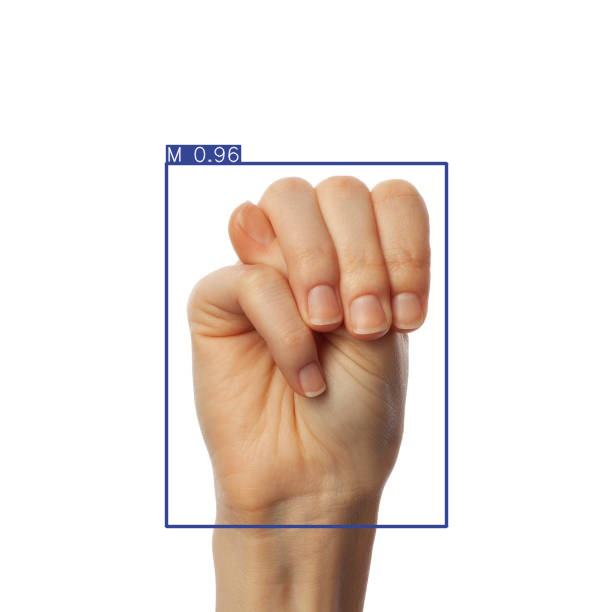

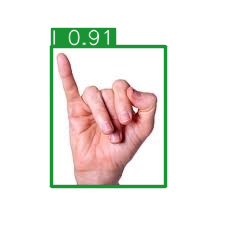

In [4]:
results_t = yolo_model_s(["WhatsApp Image 2024-02-08 at 15.46.55_fbf487d0.jpg", "WhatsApp Image 2024-02-08 at 15.48.04_2e487024.jpg"]) 
for r in results_t:
    im_array = r.plot()  
    im = Image.fromarray(im_array[..., ::-1])  
    im.show()  

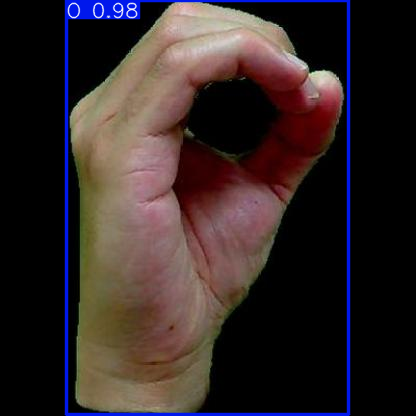

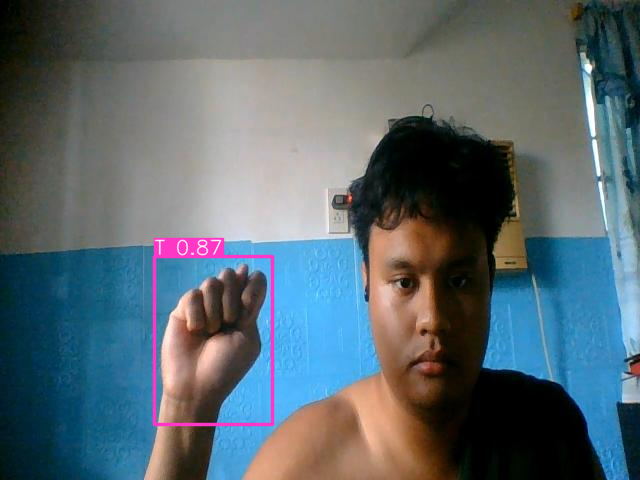

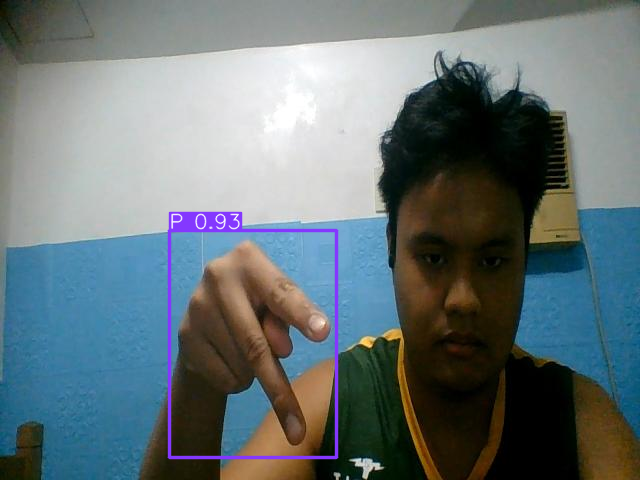

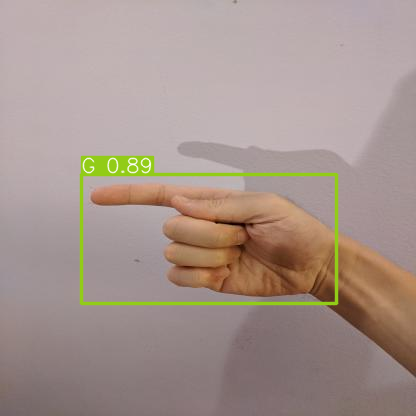

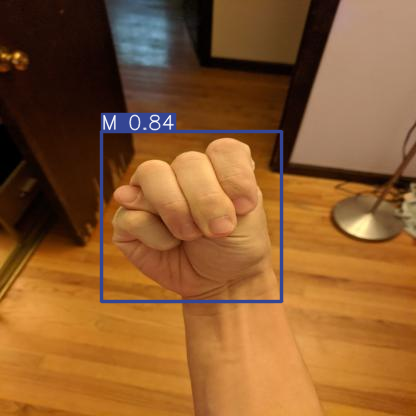

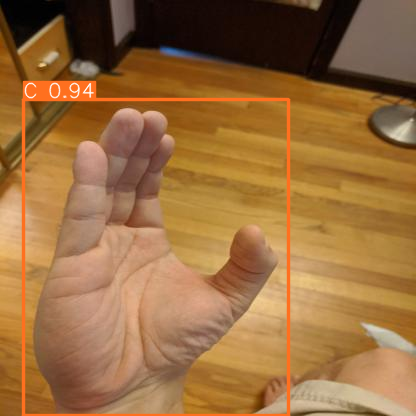

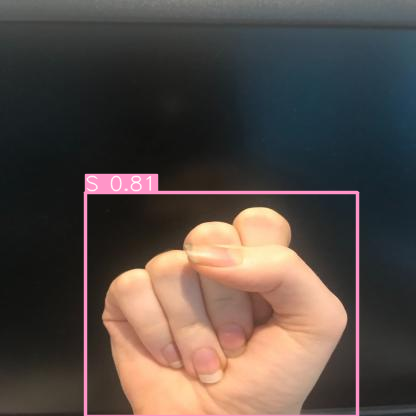

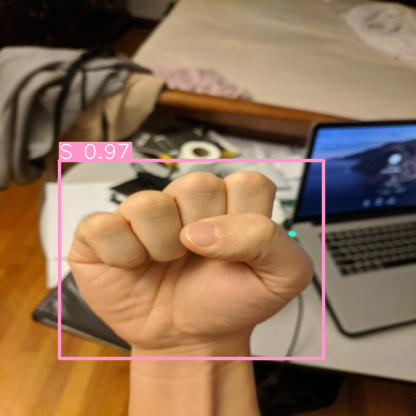

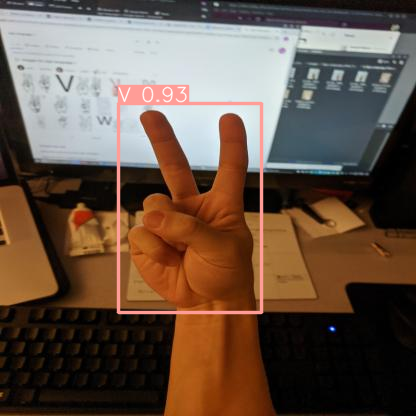

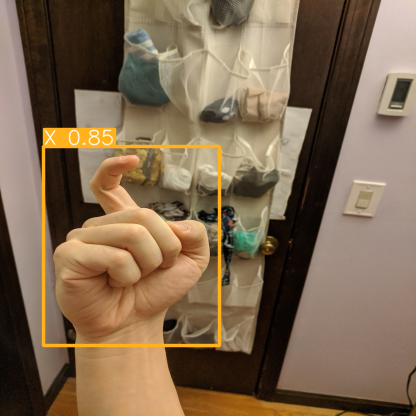

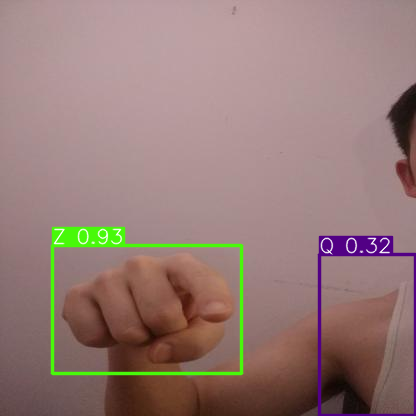

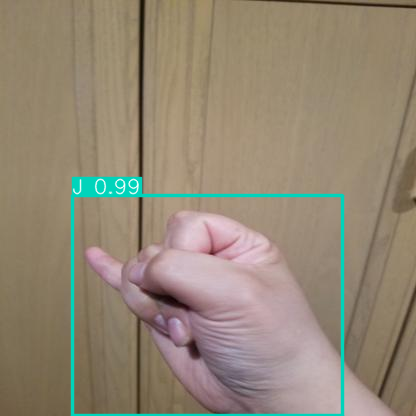

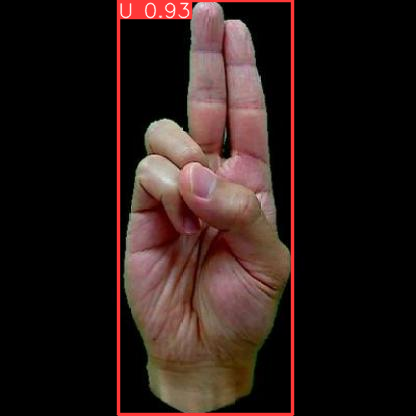

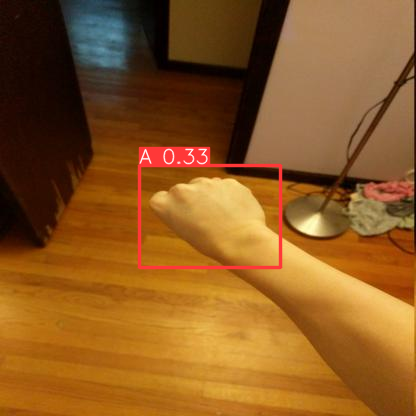

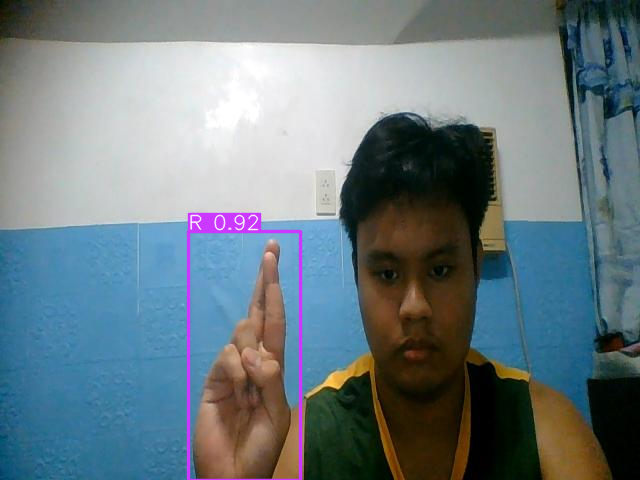

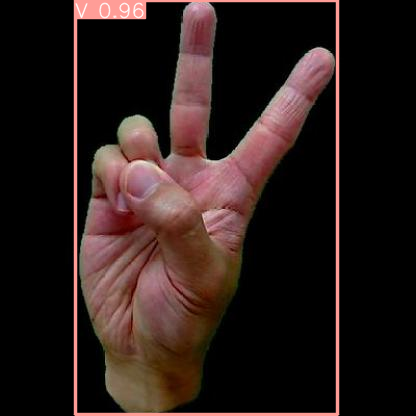

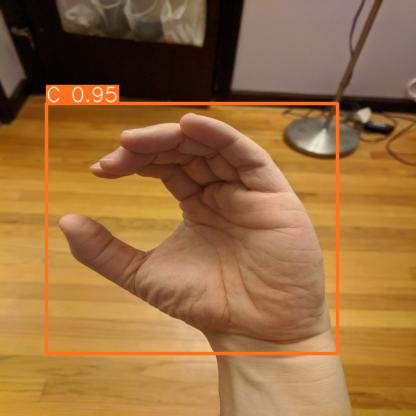

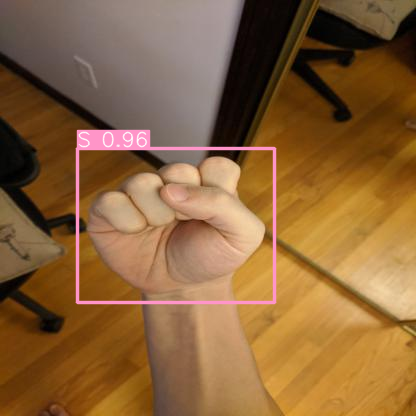

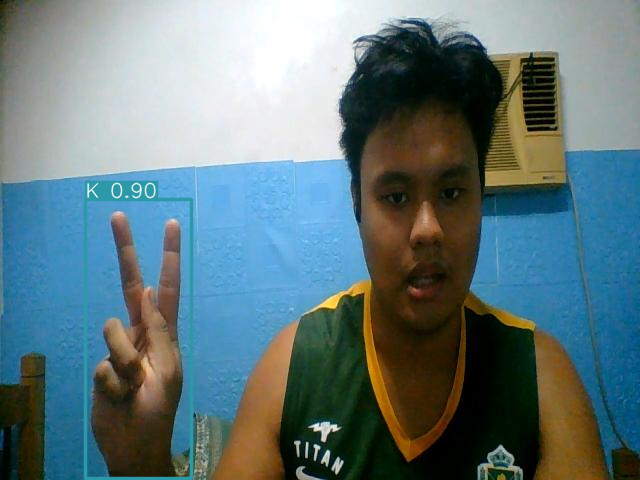

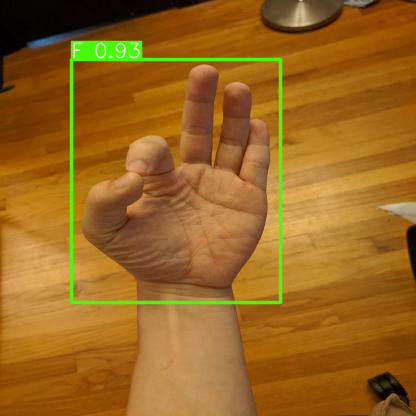

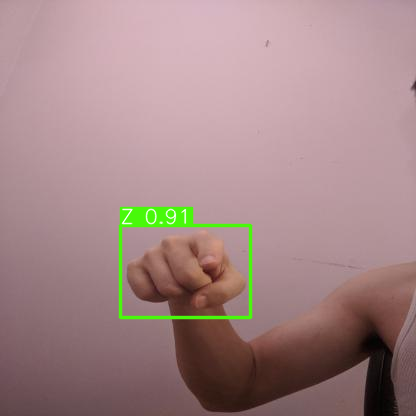

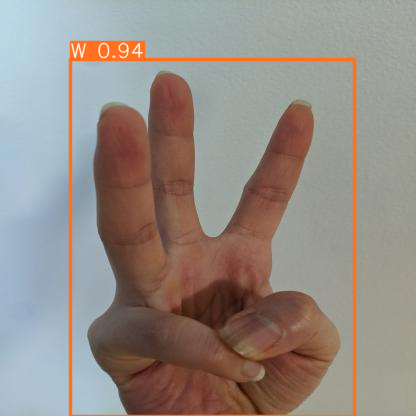

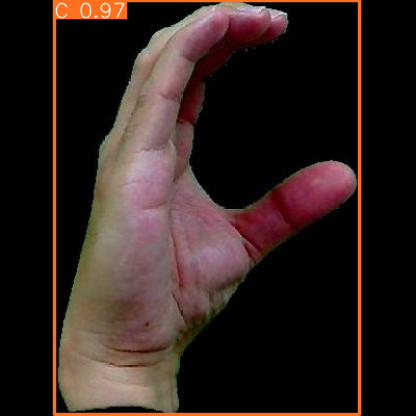

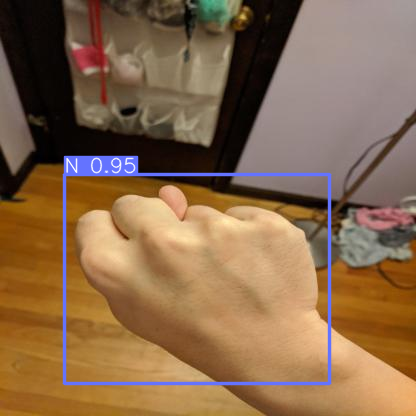

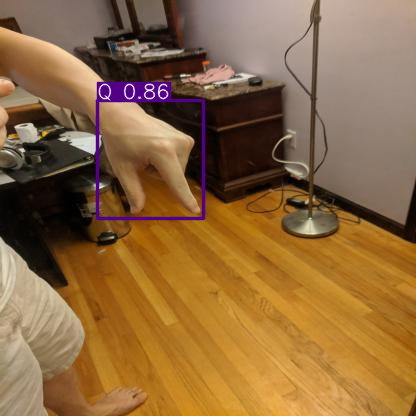

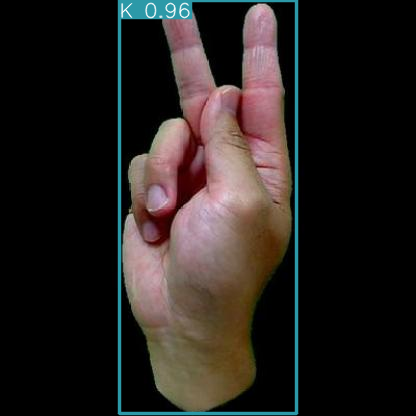

In [3]:
test_images = glob.glob("test/images/*.jpg")
test_images_26 = np.random.choice(test_images, 26, replace=False).tolist()
results_s = yolo_model_s(test_images_26)  
for r in results_s:
    im_array = r.plot()  
    im = Image.fromarray(im_array[..., ::-1])  
    im.show()  

#### Extra Large Model

In [1]:
from ultralytics import YOLO, checks, hub
checks()

hub.login('')

model = YOLO('https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV')
results = model.train()

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Setup complete ✅ (32 CPUs, 15.5 GB RAM, 97.0/1006.9 GB disk)
requirements: Ultralytics requirement ['hub-sdk>=0.0.2'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['hub-sdk>=0.0.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics HUB: New authentication successful ✅
Ultralytics HUB: View model at https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV 🚀
New https://pypi.org/project/ultralytics/8.1.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=https://storage.googleapis.com/ultralytics-hub.appspot.com/users/he3Y5nY6F2bv4RW9

100%|██████████| 87.7M/87.7M [00:09<00:00, 9.75MB/s]
Unzipping asl.zip to /home/atalaydenknalbant/jupyter_notebooks/datasets/asl...: 100%|██████████| 13772/13772 [00:01<00:00, 11715.56file/s]


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

train: Scanning /home/atalaydenknalbant/jupyter_notebooks/datasets/asl/train/labels... 6455 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:05<00:00, 1285.15it/s]

train: New cache created: /home/atalaydenknalbant/jupyter_notebooks/datasets/asl/train/labels.cache



train: Caching images (3.1GB ram): 100%|██████████| 6455/6455 [00:01<00:00, 4167.56it/s]
val: Scanning /home/atalaydenknalbant/jupyter_notebooks/datasets/asl/valid/labels... 276 images, 0 backgrounds, 0 corrupt: 100%|██████████| 276/276 [00:00<00:00, 601.34it/s]

val: New cache created: /home/atalaydenknalbant/jupyter_notebooks/datasets/asl/valid/labels.cache



val: Caching images (0.1GB ram): 100%|██████████| 276/276 [00:00<00:00, 2558.55it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0004375), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train13
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       9.9G     0.6749      2.421      1.213         36        416: 100%|██████████| 231/231 [01:25<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        276        276      0.666      0.759      0.802      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.4G      0.532      1.196      1.073         39        416: 100%|██████████| 231/231 [01:15<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        276        276      0.795      0.779      0.853      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.1G      0.589      1.236      1.108         46        416: 100%|██████████| 231/231 [01:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        276        276      0.664       0.67      0.737      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.2G     0.6471        1.3      1.146         37        416: 100%|██████████| 231/231 [01:15<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        276        276      0.688      0.765       0.83      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.2G     0.6048      1.144       1.12         39        416: 100%|██████████| 231/231 [01:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        276        276      0.726      0.691      0.793      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.2G      0.567      1.028      1.101         38        416: 100%|██████████| 231/231 [01:15<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        276        276      0.831      0.787      0.897      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.2G     0.5459     0.9556      1.091         38        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        276        276      0.902      0.872      0.936      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.2G     0.5265     0.8914      1.081         42        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        276        276      0.794      0.832        0.9       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.2G     0.5045     0.8334      1.071         35        416: 100%|██████████| 231/231 [01:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        276        276      0.915      0.913      0.967      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.2G     0.4942     0.8015      1.065         34        416: 100%|██████████| 231/231 [01:15<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        276        276      0.867      0.861      0.921      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.2G     0.4834     0.7657      1.059         42        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        276        276      0.906      0.867      0.929      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.2G     0.4698     0.7448      1.051         31        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        276        276      0.875      0.888      0.931      0.792


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.2G     0.4585     0.7083      1.047         42        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        276        276      0.885      0.912      0.952      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.2G     0.4587     0.6918      1.047         36        416: 100%|██████████| 231/231 [01:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        276        276      0.873      0.895      0.934       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.2G     0.4479     0.6719      1.044         38        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        276        276       0.94      0.904      0.971      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.2G     0.4404     0.6531      1.037         37        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        276        276       0.89       0.91      0.922      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.2G     0.4373     0.6291      1.032         44        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        276        276      0.913      0.912      0.952      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.2G     0.4325     0.6122      1.034         37        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        276        276      0.934      0.919      0.961      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.2G     0.4146     0.5875       1.02         40        416: 100%|██████████| 231/231 [01:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        276        276      0.924      0.918      0.959      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.91G     0.4216     0.5946      1.022         42        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        276        276      0.901      0.926      0.949      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.2G     0.4189     0.5831      1.028         34        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        276        276      0.956      0.956      0.975       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.2G      0.414     0.5715      1.022         42        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        276        276      0.951       0.92       0.97      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.2G      0.409     0.5612      1.023         31        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        276        276      0.924      0.924      0.961      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.2G      0.405      0.552      1.015         37        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        276        276       0.93      0.898      0.961      0.807


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.2G     0.4005     0.5421      1.018         41        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        276        276      0.909      0.923      0.954      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.2G     0.3983     0.5374      1.015         44        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        276        276      0.947      0.936      0.972      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.2G      0.387     0.5037      1.011         35        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        276        276      0.951       0.95      0.978      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.2G     0.3894     0.5165      1.014         35        416: 100%|██████████| 231/231 [01:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        276        276      0.949       0.94      0.968      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.1G      0.394     0.5135      1.018         38        416: 100%|██████████| 231/231 [01:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        276        276       0.94      0.933      0.971      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.2G     0.3858     0.4923      1.003         41        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        276        276      0.926      0.915      0.962      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.1G     0.3858     0.4821       1.01         47        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        276        276      0.941       0.93      0.977      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.1G     0.3762     0.4802      1.009         42        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        276        276      0.941       0.93      0.959      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.2G     0.3751      0.472      1.006         42        416: 100%|██████████| 231/231 [01:15<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        276        276      0.936       0.93      0.959      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.2G     0.3701     0.4711     0.9982         32        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        276        276      0.933      0.899       0.96      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.2G     0.3736     0.4583      1.003         43        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        276        276      0.914      0.942      0.961      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.1G     0.3633     0.4473     0.9996         34        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        276        276      0.932      0.904      0.967      0.813


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.1G     0.3643     0.4424      0.994         32        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        276        276      0.914      0.943      0.966      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.2G     0.3604     0.4407     0.9938         43        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        276        276      0.939       0.93      0.971      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.2G      0.362     0.4368     0.9967         34        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        276        276      0.941      0.923      0.968      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.2G      0.359     0.4312     0.9923         37        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        276        276      0.933      0.938      0.954      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.2G     0.3527     0.4139      0.991         36        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        276        276      0.949      0.918      0.972      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.2G     0.3517     0.4113     0.9914         36        416: 100%|██████████| 231/231 [01:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        276        276      0.921       0.94      0.958      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.2G     0.3487      0.406      0.993         41        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        276        276       0.92      0.941      0.964      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.2G     0.3499     0.4019     0.9828         40        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        276        276       0.94      0.929      0.968       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.2G     0.3465     0.3941     0.9828         41        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        276        276      0.953      0.922      0.962       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.2G     0.3455     0.4004     0.9896         36        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        276        276      0.952      0.942      0.972      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.2G     0.3501     0.3923     0.9883         35        416: 100%|██████████| 231/231 [01:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        276        276      0.953      0.927      0.963      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.2G     0.3445     0.3828     0.9818         35        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        276        276      0.916      0.956      0.968      0.822


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.2G     0.3423     0.3877     0.9795         39        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        276        276      0.935      0.923      0.957       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.2G     0.3339     0.3689     0.9725         32        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        276        276      0.912       0.93      0.954      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.2G     0.3346     0.3718     0.9801         46        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        276        276      0.934      0.938      0.952      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.2G      0.328       0.36     0.9762         73        416:  84%|████████▍ | 195/231 [01:03<00:11,  3.05it/s]2024-02-09 21:54:53,233 - hub_sdk.helpers.logger - ERROR - Failed to upload file for model: 'NoneType' object has no attribute 'status_code'
Exception in thread Thread-155 (retry_request):
Traceback (most recent call last):
  File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/urllib3/response.py", line 710, in _error_catcher
    yield
  File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/urllib3/response.py", line 1073, in read_chunked
    self._update_chunk_length()
  File "/home/atalaydenknalbant/.local/lib/python3.10/site-packages/urllib3/response.py", line 1008, in _update_chunk_length
    raise InvalidChunkLength(self, line) from None
urllib3.exceptions.InvalidChunkLength: InvalidChunkLength(got length b'', 0 bytes read)

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
 

                   all        276        276      0.936      0.942      0.963      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.2G     0.3343     0.3672     0.9736         39        416: 100%|██████████| 231/231 [01:15<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        276        276      0.938      0.909      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.2G     0.3312     0.3587     0.9746         28        416: 100%|██████████| 231/231 [01:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        276        276       0.95      0.924      0.964      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.2G     0.3343     0.3599     0.9737         43        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        276        276      0.943       0.93      0.964      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.2G     0.3278       0.35     0.9681         41        416: 100%|██████████| 231/231 [01:15<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        276        276      0.947      0.925       0.96      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.2G     0.3185     0.3421     0.9712         44        416: 100%|██████████| 231/231 [01:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        276        276      0.943      0.937      0.966      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.2G     0.3219     0.3455     0.9742         32        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        276        276      0.955       0.94      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.2G     0.3158     0.3291      0.962         42        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        276        276      0.958      0.956      0.975      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.2G     0.3177     0.3389     0.9662         44        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        276        276      0.972      0.947      0.975      0.837


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.2G      0.317     0.3288     0.9681         38        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        276        276      0.945      0.946      0.962      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.2G     0.3089     0.3175     0.9697         41        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        276        276      0.941       0.94      0.965      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.2G     0.3111     0.3228     0.9724         41        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        276        276       0.96      0.929      0.966      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.2G     0.3071     0.3102     0.9646         37        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        276        276      0.955      0.926       0.96       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.2G     0.3004      0.304      0.962         39        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        276        276      0.944      0.938       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.2G     0.3029     0.3059     0.9632         39        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        276        276      0.932      0.941      0.969      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.1G     0.2969     0.2973      0.953         42        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        276        276      0.938      0.945       0.97      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.2G     0.2994     0.3012     0.9608         36        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        276        276      0.931      0.941      0.965      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.2G     0.2963     0.2956     0.9605         43        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        276        276       0.92      0.938      0.959      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.2G     0.2947     0.2935     0.9612         41        416: 100%|██████████| 231/231 [01:15<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        276        276      0.944      0.957      0.969      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.2G     0.2959     0.2896     0.9623         41        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        276        276       0.95      0.947      0.969      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.2G     0.2914     0.2808     0.9593         44        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        276        276      0.946      0.948      0.965      0.828


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.2G     0.2893     0.2797     0.9531         41        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        276        276      0.945       0.95      0.964      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.2G     0.2898     0.2818     0.9543         43        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        276        276      0.965      0.939      0.974      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.2G     0.2838     0.2715      0.955         36        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        276        276      0.966      0.927      0.971      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.2G     0.2861     0.2716     0.9486         45        416: 100%|██████████| 231/231 [01:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        276        276      0.949      0.916      0.961       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.1G     0.2837     0.2708     0.9536         33        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        276        276      0.955      0.919       0.96      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.2G     0.2835     0.2671       0.95         37        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        276        276      0.958      0.926      0.968      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.1G     0.2794     0.2593     0.9458         38        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        276        276      0.933      0.924      0.964      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.2G     0.2742     0.2538     0.9486         32        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        276        276      0.954      0.922      0.965      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.1G     0.2713     0.2467     0.9482         38        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        276        276      0.948      0.923      0.966      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.2G     0.2696     0.2508      0.946         35        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        276        276      0.957      0.928      0.971       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.2G     0.2716     0.2464     0.9428         35        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        276        276      0.949      0.912      0.967      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.2G     0.2672     0.2423     0.9419         40        416: 100%|██████████| 231/231 [01:15<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        276        276      0.955      0.902      0.966      0.823


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.2G     0.2637     0.2414     0.9451         37        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        276        276      0.944        0.9       0.96      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.2G     0.2657     0.2383     0.9456         36        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        276        276      0.941      0.915      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.1G     0.2597     0.2298     0.9417         36        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        276        276      0.958      0.912       0.96      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.2G     0.2618     0.2298     0.9413         42        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        276        276      0.955      0.916      0.965      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.2G     0.2572     0.2275     0.9432         38        416: 100%|██████████| 231/231 [01:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        276        276      0.952      0.934      0.966      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.2G     0.2551     0.2263     0.9372         34        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        276        276      0.943      0.923      0.965      0.827


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.2G     0.1757     0.1017     0.8636         15        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        276        276      0.938      0.936      0.965      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.2G     0.1737    0.09893     0.8651         15        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        276        276      0.929      0.946      0.963      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.2G     0.1737    0.09917      0.866         15        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        276        276      0.922      0.947      0.961      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.2G     0.1698    0.09561     0.8616         15        416: 100%|██████████| 231/231 [01:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]

                   all        276        276      0.919      0.937      0.959      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.1G     0.1681    0.09377     0.8629         15        416: 100%|██████████| 231/231 [01:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        276        276      0.923       0.93      0.958      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.2G     0.1642    0.09132     0.8615         15        416: 100%|██████████| 231/231 [01:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        276        276       0.94      0.924      0.958      0.824


Ultralytics HUB: Uploading checkpoint https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.2G     0.1613    0.08978     0.8594         15        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        276        276       0.94      0.928      0.958      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.2G     0.1592    0.08735     0.8596         15        416: 100%|██████████| 231/231 [01:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        276        276      0.938      0.929      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.1G     0.1567    0.08489     0.8573         15        416: 100%|██████████| 231/231 [01:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        276        276      0.933      0.935      0.961      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.2G     0.1531    0.08337     0.8567         15        416: 100%|██████████| 231/231 [01:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        276        276      0.936      0.937      0.964      0.828



100 epochs completed in 2.144 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 136.7MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Model summary (fused): 268 layers, 68148606 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]


                   all        276        276      0.958      0.956      0.975      0.842
                     A        276          8      0.972          1      0.995       0.82
                     B        276          9      0.975      0.889      0.961      0.839
                     C        276          3      0.726          1      0.995      0.808
                     D        276         10      0.999          1      0.995       0.83
                     E        276          4      0.919          1      0.995      0.839
                     F        276          8      0.969          1      0.995       0.86
                     G        276          5      0.974          1      0.995      0.838
                     H        276          9      0.986          1      0.995      0.761
                     I        276          6      0.915      0.833      0.844      0.733
                     J        276          9      0.977      0.889      0.903      0.642
                     

100%|██████████| 130M/130M [00:00<00:00, 2.41GB/s]

Ultralytics HUB: Done ✅
Ultralytics HUB: View model at https://hub.ultralytics.com/models/m3cH6mrKni5LIfXelaZV 🚀


In [1]:
from ultralytics import YOLO

yolo_model_x = YOLO("yolov8x.pt")  
yolo_model_x.train(data="data.yaml", imgsz=416, epochs=200, dropout=0.5, seed=42, plots=True)  
yolo_model_x.export(format="tflite") 

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/atalaydenknalbant/jupyter_notebooks/data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

train: Scanning /home/atalaydenknalbant/jupyter_notebooks/train/labels.cache... 6250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6250/6250 [00:00<?, ?it/s]
val: Scanning /home/atalaydenknalbant/jupyter_notebooks/valid/labels.cache... 263 images, 0 backgrounds, 0 corrupt: 100%|██████████| 263/263 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.14G      0.631      2.154      1.168         20        416: 100%|██████████| 391/391 [01:18<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]

                   all        263        263      0.716      0.769      0.871      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      6.38G     0.5455      1.206      1.054         23        416: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        263        263      0.806      0.765      0.877      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      6.52G     0.6152      1.195        1.1         24        416: 100%|██████████| 391/391 [01:16<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]

                   all        263        263      0.643      0.744      0.778       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      6.39G     0.6424      1.245      1.123         30        416: 100%|██████████| 391/391 [01:13<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.54it/s]

                   all        263        263      0.812      0.709      0.832      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      6.52G     0.6162      1.119      1.114         24        416: 100%|██████████| 391/391 [01:12<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.54it/s]

                   all        263        263      0.828      0.824      0.903      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      6.51G     0.5924      1.046      1.104         27        416: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.65it/s]

                   all        263        263      0.874      0.793       0.91      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      6.49G     0.5633     0.9486      1.083         27        416: 100%|██████████| 391/391 [01:12<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]

                   all        263        263      0.816      0.839      0.879      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      6.39G     0.5383     0.8842      1.066         27        416: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.49it/s]

                   all        263        263      0.869      0.835      0.909       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      6.38G      0.526     0.8463      1.064         25        416: 100%|██████████| 391/391 [01:13<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]

                   all        263        263      0.864        0.9      0.946      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       6.5G     0.5134     0.8065      1.055         25        416: 100%|██████████| 391/391 [01:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]

                   all        263        263      0.859      0.895      0.922      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.49G     0.4962     0.7812      1.055         31        416: 100%|██████████| 391/391 [01:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.33it/s]

                   all        263        263       0.91      0.898      0.964      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      6.51G     0.4864     0.7515      1.047         29        416: 100%|██████████| 391/391 [01:12<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        263        263      0.898      0.905      0.946      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      6.51G     0.4731      0.721       1.04         27        416: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]

                   all        263        263      0.896      0.923      0.964      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      6.36G     0.4719     0.7147      1.043         20        416: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]

                   all        263        263      0.931      0.915      0.959      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      6.36G      0.467     0.6911       1.04         27        416: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.68it/s]

                   all        263        263      0.928      0.912      0.964      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      6.38G     0.4645     0.6746       1.04         34        416: 100%|██████████| 391/391 [01:14<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.23it/s]

                   all        263        263      0.928      0.934      0.972      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      6.38G     0.4544     0.6656       1.03         24        416: 100%|██████████| 391/391 [01:14<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.36it/s]

                   all        263        263      0.928       0.91      0.974      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      6.37G     0.4477     0.6326      1.027         26        416: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]

                   all        263        263      0.926      0.903      0.965       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      6.49G     0.4409     0.6253      1.027         25        416: 100%|██████████| 391/391 [01:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

                   all        263        263      0.941      0.921      0.962      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      6.51G     0.4347     0.6212      1.022         27        416: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.74it/s]

                   all        263        263      0.912       0.93      0.957      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      6.38G      0.436     0.6036      1.026         25        416: 100%|██████████| 391/391 [01:12<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        263        263      0.943      0.922      0.965      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      6.37G     0.4309     0.5922       1.02         29        416: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        263        263      0.916      0.921      0.968      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      6.38G     0.4283     0.5775      1.018         23        416: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.79it/s]

                   all        263        263      0.944      0.919      0.976      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.39G     0.4185     0.5622       1.02         26        416: 100%|██████████| 391/391 [01:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.85it/s]

                   all        263        263      0.952      0.924      0.975      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      6.39G     0.4177     0.5543      1.018         21        416: 100%|██████████| 391/391 [01:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]

                   all        263        263      0.942      0.939      0.973      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       6.5G     0.4158     0.5499       1.02         26        416: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]

                   all        263        263      0.927      0.934      0.969      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.36G      0.409      0.545      1.011         23        416: 100%|██████████| 391/391 [01:12<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]

                   all        263        263      0.928      0.933       0.96      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.38G     0.4068     0.5417       1.02         21        416: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]

                   all        263        263      0.917      0.912      0.963      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      6.52G      0.411      0.536      1.017         23        416: 100%|██████████| 391/391 [01:12<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        263        263      0.935      0.923      0.972      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200       6.5G     0.4058     0.5305      1.009         37        416: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]

                   all        263        263      0.953      0.944      0.978       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      6.36G     0.3946     0.5073      1.004         17        416: 100%|██████████| 391/391 [01:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]

                   all        263        263      0.951      0.947      0.972      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      6.51G     0.3994     0.5059      1.002         23        416: 100%|██████████| 391/391 [01:15<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.72it/s]

                   all        263        263       0.93      0.957      0.977      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      6.39G     0.3962     0.4988      1.001         17        416: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.37it/s]

                   all        263        263      0.921      0.914      0.956      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200       6.5G     0.3918     0.4985      1.001         22        416: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]

                   all        263        263      0.938      0.924      0.958      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.36G     0.3918     0.4835     0.9981         22        416: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]

                   all        263        263       0.94      0.933      0.968      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      6.38G      0.387     0.4896      1.001         30        416: 100%|██████████| 391/391 [01:13<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.39it/s]

                   all        263        263      0.953       0.92      0.973      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      6.51G     0.3892      0.485      1.006         22        416: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

                   all        263        263      0.938      0.917      0.963      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.37G     0.3808     0.4639      1.003         22        416: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]

                   all        263        263      0.937      0.951      0.971       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      6.35G     0.3817     0.4642     0.9968         29        416: 100%|██████████| 391/391 [01:13<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.61it/s]

                   all        263        263      0.964      0.928      0.973      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      6.39G     0.3806     0.4665      1.004         23        416: 100%|██████████| 391/391 [01:12<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]

                   all        263        263      0.957      0.933       0.96      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      6.51G     0.3789      0.458     0.9992         29        416: 100%|██████████| 391/391 [01:11<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]

                   all        263        263      0.958      0.922      0.973      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      6.36G     0.3741     0.4503     0.9969         23        416: 100%|██████████| 391/391 [01:14<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.23it/s]

                   all        263        263      0.948      0.949      0.977      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      6.37G      0.373     0.4437     0.9943         28        416: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.29it/s]

                   all        263        263      0.955      0.932      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      6.37G     0.3718     0.4548     0.9908         21        416: 100%|██████████| 391/391 [01:14<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        263        263      0.953      0.924      0.976      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      6.38G     0.3691     0.4371     0.9923         32        416: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        263        263      0.927       0.93      0.976      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      6.37G     0.3687     0.4338     0.9929         30        416: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]

                   all        263        263      0.931      0.945      0.972      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      6.37G     0.3652     0.4224     0.9883         27        416: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]

                   all        263        263      0.946      0.892       0.97      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      6.38G     0.3613     0.4212      0.989         32        416: 100%|██████████| 391/391 [01:13<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.33it/s]

                   all        263        263      0.941      0.924      0.971      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      6.52G      0.369     0.4339     0.9903         26        416: 100%|██████████| 391/391 [01:14<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        263        263      0.957      0.923      0.972      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       6.5G     0.3627     0.4198     0.9878         22        416: 100%|██████████| 391/391 [01:14<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]

                   all        263        263      0.952      0.909      0.962      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      6.49G     0.3614     0.4196     0.9898         22        416: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]

                   all        263        263       0.94      0.919      0.965      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      6.39G     0.3582     0.4101     0.9822         22        416: 100%|██████████| 391/391 [01:14<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]

                   all        263        263      0.937      0.932      0.969      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      6.52G     0.3577     0.4072     0.9844         25        416: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        263        263      0.925      0.927      0.967      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      6.51G     0.3536      0.409     0.9846         27        416: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        263        263      0.947      0.939      0.968      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      6.49G     0.3543     0.4034     0.9859         27        416: 100%|██████████| 391/391 [01:13<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]

                   all        263        263       0.95      0.933      0.963      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      6.51G     0.3556      0.407     0.9807         26        416: 100%|██████████| 391/391 [01:10<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.65it/s]

                   all        263        263      0.948      0.925      0.963      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      6.38G     0.3518     0.3944     0.9871         22        416: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.76it/s]

                   all        263        263      0.943      0.923      0.965      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       6.5G     0.3525      0.395     0.9826         24        416: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.92it/s]

                   all        263        263      0.942      0.919      0.965      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      6.36G     0.3491     0.3958     0.9739         27        416: 100%|██████████| 391/391 [01:12<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]

                   all        263        263       0.96       0.94      0.978      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      6.38G     0.3497     0.3835     0.9774         25        416: 100%|██████████| 391/391 [01:12<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]

                   all        263        263      0.954       0.93      0.975      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      6.51G     0.3511      0.383     0.9797         23        416: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]

                   all        263        263      0.939       0.93      0.975       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      6.37G     0.3474     0.3804     0.9798         20        416: 100%|██████████| 391/391 [01:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.83it/s]

                   all        263        263      0.944      0.927      0.966       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      6.36G     0.3403       0.38     0.9784         26        416: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.68it/s]

                   all        263        263      0.964      0.937      0.972      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      6.51G     0.3395     0.3728     0.9771         30        416: 100%|██████████| 391/391 [01:12<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]

                   all        263        263      0.966      0.946      0.973      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      6.51G     0.3412     0.3736     0.9727         26        416: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.61it/s]

                   all        263        263      0.944      0.943      0.967      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      6.49G      0.341     0.3672      0.972         20        416: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.59it/s]

                   all        263        263      0.939      0.933      0.969      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      6.49G     0.3368     0.3617      0.974         25        416: 100%|██████████| 391/391 [01:13<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.24it/s]

                   all        263        263      0.949      0.932      0.968      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      6.38G     0.3401     0.3573      0.974         26        416: 100%|██████████| 391/391 [01:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]

                   all        263        263      0.957      0.931      0.968      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      6.38G     0.3384     0.3654     0.9724         26        416: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]

                   all        263        263      0.948      0.917      0.961      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      6.37G     0.3389     0.3627     0.9758         30        416: 100%|██████████| 391/391 [01:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]

                   all        263        263      0.961      0.934       0.97      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      6.36G     0.3351     0.3496     0.9764         21        416: 100%|██████████| 391/391 [01:24<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.68it/s]

                   all        263        263      0.957      0.931      0.977      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      6.39G     0.3329     0.3484     0.9706         29        416: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.65it/s]

                   all        263        263      0.957      0.945      0.975      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      6.52G     0.3316     0.3498     0.9734         22        416: 100%|██████████| 391/391 [01:22<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.76it/s]

                   all        263        263      0.958      0.912      0.968       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200       6.5G     0.3256     0.3435     0.9675         20        416: 100%|██████████| 391/391 [01:20<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        263        263      0.947      0.926       0.96      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      6.49G     0.3309     0.3425     0.9681         21        416: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]

                   all        263        263      0.938      0.934      0.962      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      6.39G     0.3265     0.3434     0.9701         18        416: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]

                   all        263        263      0.945      0.915      0.968      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      6.38G     0.3275     0.3377     0.9687         26        416: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]

                   all        263        263      0.943      0.922      0.968      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      6.36G     0.3302     0.3395     0.9661         29        416: 100%|██████████| 391/391 [01:16<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]

                   all        263        263      0.944      0.935       0.97      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      6.49G     0.3256     0.3297     0.9678         26        416: 100%|██████████| 391/391 [01:16<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.43it/s]

                   all        263        263      0.956      0.936      0.976      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      6.37G     0.3233     0.3346     0.9644         28        416: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]

                   all        263        263      0.956      0.941      0.976       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      6.38G     0.3215     0.3279      0.966         27        416: 100%|██████████| 391/391 [01:15<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.94it/s]

                   all        263        263      0.947       0.93      0.966      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      6.37G     0.3201     0.3272     0.9666         28        416: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        263        263       0.95      0.931      0.974      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      6.49G     0.3226     0.3258     0.9691         30        416: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.35it/s]

                   all        263        263      0.959      0.947      0.979      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      6.38G      0.322     0.3308     0.9681         25        416: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]

                   all        263        263      0.958      0.921      0.973      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      6.51G     0.3145     0.3191     0.9626         30        416: 100%|██████████| 391/391 [01:16<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]

                   all        263        263      0.958       0.91      0.968      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      6.37G     0.3175      0.324     0.9653         29        416: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        263        263       0.96      0.918      0.971       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      6.37G     0.3159     0.3207     0.9619         28        416: 100%|██████████| 391/391 [01:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.35it/s]

                   all        263        263      0.957      0.913      0.966      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      6.38G     0.3139     0.3176     0.9616         26        416: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.73it/s]

                   all        263        263      0.961      0.938      0.967      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      6.39G     0.3181      0.318     0.9589         28        416: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]

                   all        263        263      0.946      0.941      0.968      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      6.35G     0.3127     0.3093     0.9583         27        416: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]

                   all        263        263      0.931      0.947      0.968      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      6.37G     0.3096     0.3037     0.9582         27        416: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.82it/s]

                   all        263        263      0.951      0.931      0.972      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.51G     0.3094      0.307     0.9599         34        416: 100%|██████████| 391/391 [01:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        263        263      0.955      0.934      0.974      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      6.39G      0.309     0.3092     0.9617         30        416: 100%|██████████| 391/391 [01:16<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.80it/s]

                   all        263        263      0.961      0.925      0.975      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200       6.5G     0.3088     0.3046     0.9601         28        416: 100%|██████████| 391/391 [01:19<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]

                   all        263        263      0.958      0.933      0.978      0.839
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 44, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



94 epochs completed in 2.013 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 136.7MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Model summary (fused): 268 layers, 68148606 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]


                   all        263        263      0.953      0.924      0.976      0.844
                     A        263          8      0.873          1      0.954      0.797
                     B        263          9      0.884      0.849      0.963      0.856
                     C        263          3      0.961          1      0.995      0.796
                     D        263         10      0.996          1      0.995      0.829
                     E        263          4          1      0.838      0.995      0.838
                     F        263          8       0.98          1      0.995      0.863
                     G        263          5      0.827          1      0.995      0.871
                     H        263          9          1        0.9      0.995      0.817
                     I        263          6      0.735      0.833      0.858      0.751
                     J        263          9       0.99      0.889      0.902      0.589
                     

'runs/detect/train12/weights/best_saved_model/best_float32.tflite'

#### Test Images

In [ ]:
test_images = glob.glob("test/images/*.jpg")
test_images_26 = np.random.choice(test_images, 26, replace=False).tolist()
results_x = yolo_model_x(test_images_26)  
for r in results_x:
    im_array = r.plot()  
    im = Image.fromarray(im_array[..., ::-1])  
    im.show()  